## Dataset Selection

For this project, I selected the **California Housing Prices** dataset. The dataset provides information on various attributes of houses in California, including location-specific data, demographic data, and median income. This dataset is well-suited for solving a **regression ML problem** — predicting housing prices based on these features. 

### Reasons for Choosing this Dataset:
1. **Classic Regression Problem**: Predicting housing prices is a common and well-understood task, allowing us to focus on building and interpreting the model.
2. **Variety of Features**: The dataset includes relevant features, such as population, median income, and house age, which can help us understand which factors have the most impact on prices.
3. **Interpretability**: RandomForestRegressor will allow us to analyze feature importance effectively, helping us explain the model's predictions.

**Dataset Source**: The dataset is available on [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Download from Kaggle and save locally
data = pd.read_csv('housing.csv')

data.head()

# Get basic info about the dataset: structure, data types, and null values
data.info()

# Describe data to get a quick statistical summary
data.describe()

# Analyze feature significance and types
print("Unique values per column:", data.nunique())
print("Checking for missing values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Unique values per column: longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
m

## Data Structure and Initial Analysis

The dataset consists of 20,640 entries and 10 columns, most of which are numeric (`float64`), with one categorical feature: `ocean_proximity`. Here’s a summary of initial findings:

1. **Completeness**: All columns are complete except `total_bedrooms`, which has 207 missing values. These will need to be addressed, likely through imputation.
2. **Unique Values**: The dataset has several highly varied features, like `longitude` and `latitude`, while `ocean_proximity` contains only five distinct categories. This diversity in data types makes it suitable for regression analysis.
3. **Feature Relevance**: Given the numerical and categorical mix, features like `median_income`, `housing_median_age`, and `total_rooms` are expected to contribute significantly to housing price predictions.

This dataset’s completeness and structure make it well-suited for building a regression model to predict housing prices.

In [2]:
duplicates_count = data.duplicated().sum()
if duplicates_count > 0:
    data = data.drop_duplicates()
    print(f"{duplicates_count} duplicates were found and removed.")
else:
    print("No duplicates found.")

# Fill missing values in 'total_bedrooms' by assigning the median directly without inplace
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

# Convert 'ocean_proximity' into categorical numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Display info to verify changes
data.info()

# Confirm no missing values remain
print("Remaining missing values:\n", data.isnull().sum())

No duplicates found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4)

In [3]:
# Define features (X) and target variable (y)
X = data.drop(columns=['median_house_value'])  # Exclude the target variable
y = data['median_house_value']  # Set the target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to integers (0 and 1)
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Print the sizes of each set to verify the split
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 16512
Testing set size: 4128


## Model Training: RandomForestRegressor

I selected a **RandomForestRegressor** model for predicting housing prices due to its robustness against outliers and overfitting. Random Forest is an ensemble model that combines multiple decision trees, making it suitable for our regression task.

### Key Parameters:
- **n_estimators**: Number of trees in the forest. Increasing this number generally leads to better performance but increases computation time. We chose 100 trees.
- **max_depth**: Maximum depth of each tree. This parameter limits the tree levels, helping prevent overfitting.
- **random_state**: Ensures reproducible results by fixing the random seed.

### Evaluation Metrics:
- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions, giving an intuitive understanding of the prediction accuracy.
- **R² Score**: Indicates the proportion of variance explained by the model, showing how well the model fits the data.


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the RandomForestRegressor with specified parameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 36055.78
R² Score: 0.78


## Model Evaluation Results

After training the model, I evaluated its performance using Mean Absolute Error (MAE) and R² Score:

- **Mean Absolute Error (MAE)**: The model’s MAE is approximately 36,055.78, indicating the average prediction deviation from actual values. For housing prices, this deviation might be acceptable depending on the price range in the dataset.
  
- **R² Score**: The model achieved an R² score of 0.78, explaining 78% of the variance in the data. While this is a good result, there is still room for improvement through hyperparameter tuning or exploring alternative models.

Overall, these metrics suggest the model performs well but could benefit from further refinement.

## Hyperparameter Optimization with GridSearchCV

To improve the model's performance, I employed **GridSearchCV** for hyperparameter tuning. GridSearchCV allows us to systematically test multiple hyperparameter combinations to find the best configuration for the model. The selected hyperparameters and their respective ranges are as follows:

1. **n_estimators**: Number of trees in the forest, ranging from 100 to 200.
2. **max_depth**: Maximum depth of each tree, set between 5 and 15 to control model complexity.
3. **min_samples_split**: Minimum samples required to split an internal node, preventing overfitting.
4. **max_features**: Maximum number of features to consider for each split, tested with values like 'sqrt' and 'log2'.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV with RandomForestRegressor and the parameter grid
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',  # Use R² as the scoring metric
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1)  # Use all available cores for faster processing

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score from GridSearchCV:", grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Calculate evaluation metrics for the optimized model
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Original Mean Absolute Error: {mae:.2f}")
print(f"Optimized Mean Absolute Error: {mae_optimized:.2f}")
print(f"Original R² Score: {r2:.2f}")
print(f"Optimized R² Score: {r2_optimized:.2f}")


Best Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score from GridSearchCV: 0.814527619361977
Original Mean Absolute Error: 36055.78
Optimized Mean Absolute Error: 32175.73
Original R² Score: 0.78
Optimized R² Score: 0.81


## Hyperparameter Optimization Results

Using **GridSearchCV**, I optimized the RandomForestRegressor hyperparameters, resulting in the following best configuration:
- **max_depth**: 15 — Allows deeper tree structures, improving predictive accuracy while avoiding overfitting.
- **max_features**: None — Each tree uses all features, enhancing model variability and accuracy.
- **min_samples_split**: 2 — Minimum number of samples required to split a node, allowing consideration of all possible splits.
- **n_estimators**: 200 — A higher number of trees for greater stability and precision.

### Performance Comparison:
- **Original Mean Absolute Error (MAE)**: 36,055.78
- **Optimized Mean Absolute Error (MAE)**: 32,175.73
- **Original R² Score**: 0.78
- **Optimized R² Score**: 0.81

The optimized model demonstrates improved predictive performance, with a higher R² and lower MAE, indicating better overall accuracy and reliability for housing price predictions.

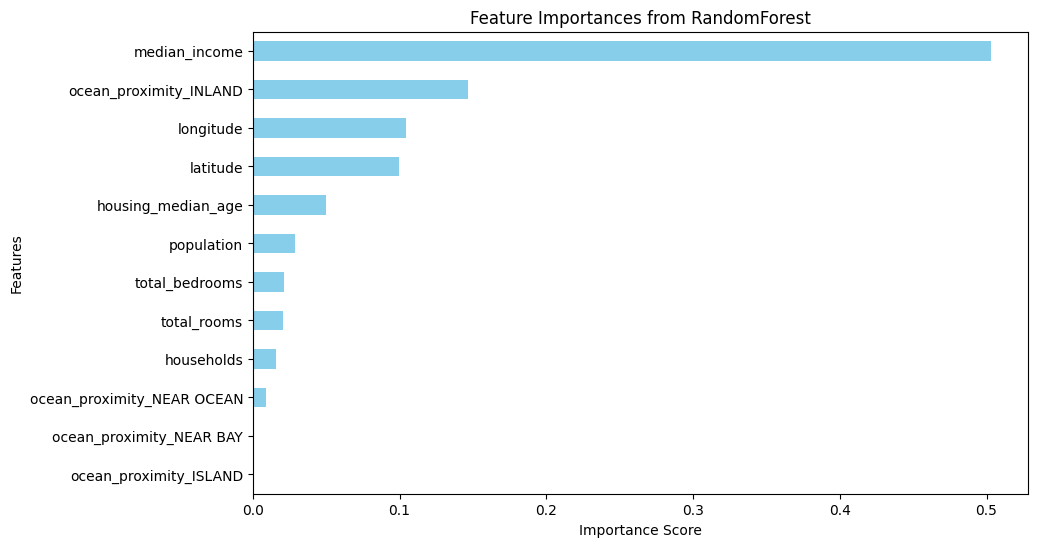

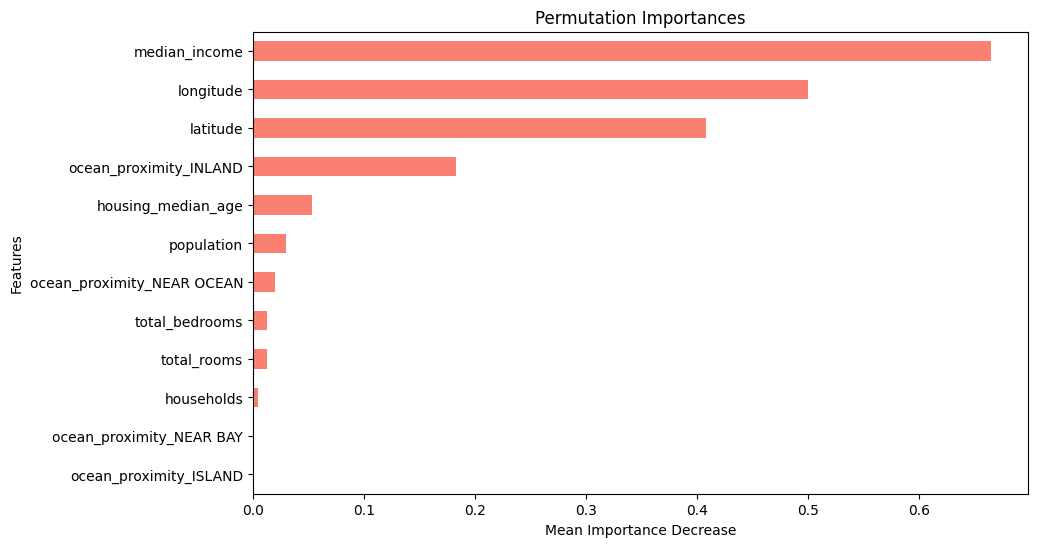

In [6]:
from sklearn.inspection import permutation_importance

feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importances from RandomForest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm_importance.importances_mean, index=X_test.columns)

plt.figure(figsize=(10, 6))
perm_importances.sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title("Permutation Importances")
plt.xlabel("Mean Importance Decrease")
plt.ylabel("Features")
plt.show()

## Feature Importance Analysis

The feature importance analysis highlights several key factors influencing housing prices:

1. **Median Income**: The most important feature, indicating that areas with higher incomes typically have more expensive housing.
2. **Geographical Location**: Features like `longitude`, `latitude`, and `ocean_proximity_INLAND` significantly impact prices, showing that housing near the ocean or in certain locations is valued higher.
3. **Other Factors**: Features such as `housing_median_age` and `population` also contribute, though to a lesser extent.

Both **feature importances** and **permutation importance** methods confirm the significance of median income and geographical location, reinforcing their role as primary drivers of housing prices in California.

<Figure size 1200x800 with 0 Axes>

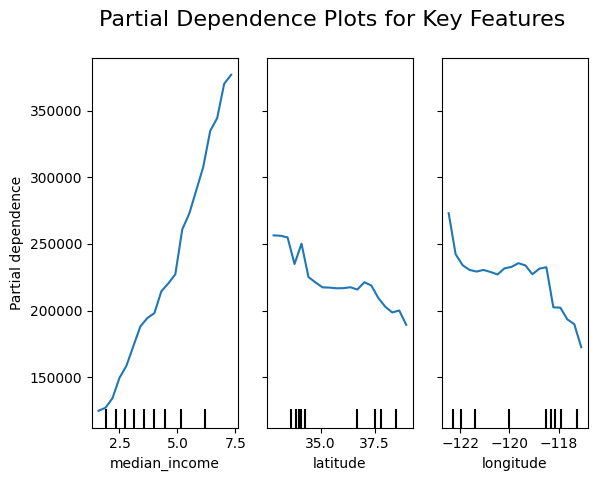

In [7]:
from sklearn.inspection import PartialDependenceDisplay

# Select key features based on feature importance analysis
features_to_plot = ['median_income', 'latitude', 'longitude']

plt.figure(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(best_model, X_train, features_to_plot, grid_resolution=20)
plt.suptitle("Partial Dependence Plots for Key Features", fontsize=16)
plt.show()

## Partial Dependence Plot Analysis

The Partial Dependence Plots (PDP) for key features reveal the following insights:

1. **Median Income**: There is a strong positive relationship between median income and housing prices. As income increases, housing prices rise significantly, confirming median income as a crucial predictor.
2. **Latitude**: A slight negative trend is observed, with housing prices generally lower at higher latitudes (further north). This suggests a regional price variation where northern areas may be less expensive. 
3. **Longitude**: Another negative trend shows housing prices decreasing as we move eastward (higher longitudes), highlighting the premium value of homes closer to the west coast.

These PDPs indicate that **median income** has the strongest influence on housing prices, while **latitude** and **longitude** also impact prices due to geographical factors.

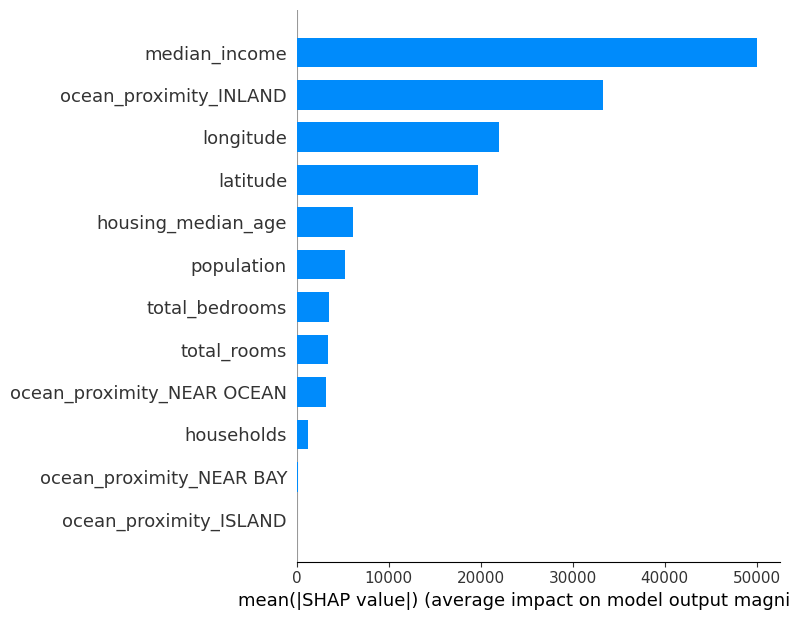

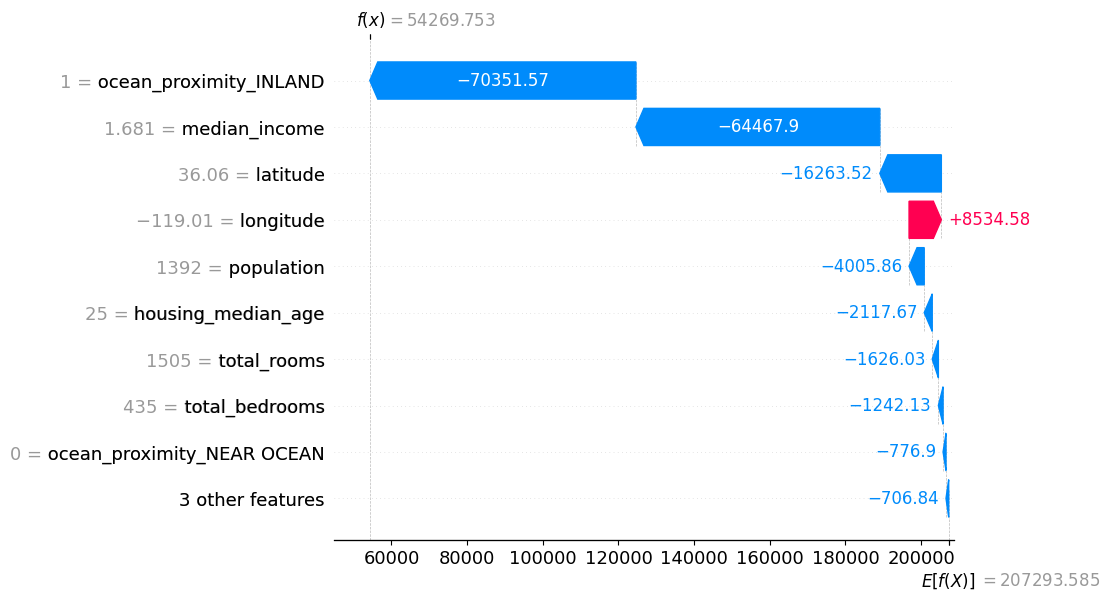

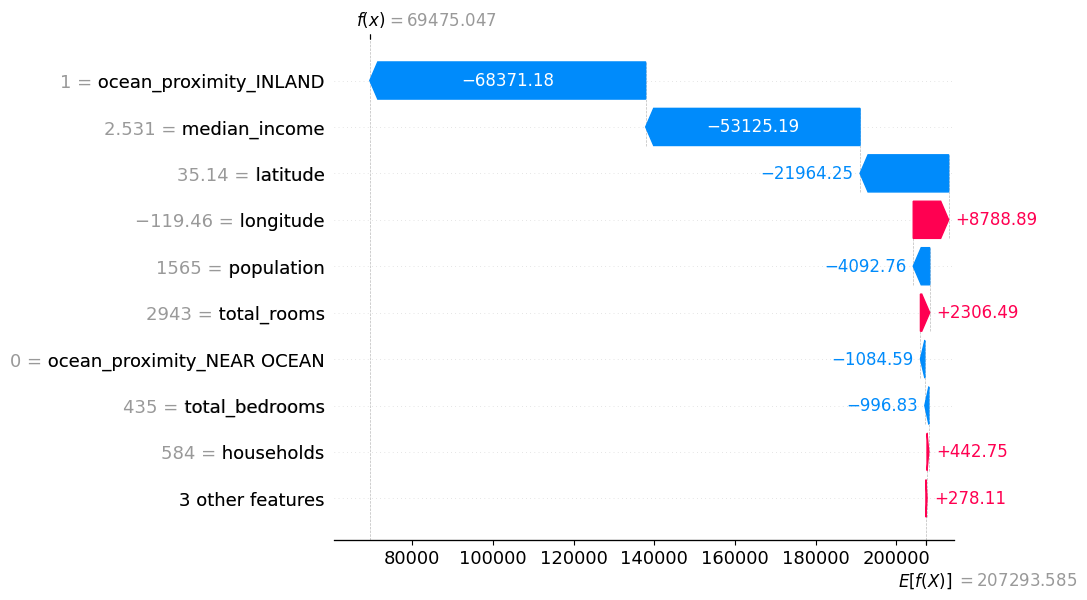

In [9]:
import shap

# Initialize SHAP explainer with the best model and the training data
explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_test)

# Plot a summary plot of SHAP values for all features
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)

# Display a waterfall plot for a single prediction (e.g., the first instance in the test set)
# This plot shows how each feature affects the prediction for a specific sample
shap.waterfall_plot(shap_values[0])

shap.waterfall_plot(shap_values[1])

## SHAP Analysis Results

1. **Summary Plot**:
   - **`median_income`** is the most influential feature, significantly impacting housing price predictions. This aligns with previous analyses, confirming income as a primary factor in housing prices.
   - **`ocean_proximity_INLAND`** has a strong negative impact, indicating that homes located inland tend to be less expensive.
   - Geographic features like **`longitude`** and **`latitude`** also play notable roles, affecting predictions based on location.
   - Features such as **`housing_median_age`** and **`population`** have smaller, yet observable effects.

2. **Waterfall Plots**:
   - In both examples, `ocean_proximity_INLAND` and `median_income` are critical influencers.
   - **For the first instance**: `ocean_proximity_INLAND` significantly decreases the predicted price (~$70,351), with `median_income` further reducing it (~$64,467).
   - **For the second instance**: `ocean_proximity_INLAND` and `median_income` similarly drive the prediction, showing the impact of being inland versus having a higher income.

### Conclusions
- **Economic and geographic factors** are key drivers of housing prices.
- **`median_income`** and **`ocean_proximity_INLAND`** are the most impactful features, with `median_income` positively correlating with price and `ocean_proximity_INLAND` reducing it.
- SHAP confirms the model’s reliance on **income and location** as primary determinants of housing value, offering a clear interpretation of how each feature influences specific predictions.

## Conclusion

The Random Forest model effectively predicts housing prices with reasonable accuracy, with `median_income` and `ocean_proximity` as the most influential features. Analysis through SHAP and PDP confirms that economic and geographic factors drive housing values. The model is both accurate and interpretable, making it suitable for understanding key determinants in housing price predictions.